Libraries

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder , OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [100]:
data = pd.read_csv("formCovid.csv",sep=",",header=0)
data

,Horodateur,Nom,Adresse e-mail,A quelle tranche d'âge appartenez vous ?,Vous êtes ?,Où habitez-vous ?,Avez vous contracté le Virus : COVID-19 ?,"Si ""oui"" : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?",Comment vous l'avait su?,Etes-vous hospitalisés ?,...,"Si ""oui"" : Citez le type de vaccin que vous avez eu ?",Combien de doses avez-vous eu ?,"Dans votre région , y avait-il une saturation des unités d'hospitalisation Covid-19 ( exp : manque de lits )?",Votre région a souffert d'une pénurie d'oxygène !,Selon vous est ce que l'état a bien gérer les différentes vagues de l'épidémie ?,Evaluer la qualité de gestion de cette crise sanitaire ? [Oxygène],Evaluer la qualité de gestion de cette crise sanitaire ? [Lits ],Evaluer la qualité de gestion de cette crise sanitaire ? [Vaccination],Evaluer la qualité de gestion de cette crise sanitaire ? [Mesures de prévention ],Evaluer la qualité de gestion de cette crise sanitaire ? [Disponibilité des tests ]
0,23/03/2022 13:14:46,Hamza Merhaben,merhaben.hamza@esprit.tn,18 – 25 ans,Homme,En Tunisie,Non,De la fièvre,Test Rapide,Non,...,Johnson & Johnson,1.0,Oui,Oui,Non,NaN,NaN,NaN,NaN,NaN
1,23/03/2022 13:31:30,Ahmed,ahmed.gontara@esprit.tn,18 – 25 ans,Homme,En Tunisie,Oui,De la fièvre,Test Rapide,Non,...,Pfizer,2.0,Oui,Oui,Non,NaN,NaN,NaN,NaN,NaN
2,23/03/2022 13:32:56,mimi,mariem.miled09@gmail.com,18 – 25 ans,Femme,En Tunisie,Oui,De la fièvre,Test Rapide,Oui,...,Johnson & Johnson,2.0,Oui,Non,Non,pas de lits suffusantes,NaN,NaN,NaN,NaN
3,23/03/2022 13:41:17,Ranim,ranime.benafia@esprit.tn,18 – 25 ans,Femme,En Tunisie,Oui,Des maux de tête,PCR,Non,...,Johnson & Johnson,1.0,Oui,Oui,Non,NaN,NaN,NaN,NaN,NaN
4,23/03/2022 13:46:30,emna,emna.toumi@esprit.tn,18 – 25 ans,Femme,En Tunisie,Oui,De la fièvre,Test Rapide,Non,...,Johnson & Johnson,1.0,Oui,Oui,Non,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,28/03/2022 12:52:33,khalil gharbi,khalilgharbi123@yahoo.fr,36 – 50 ans,Homme,En dehors de la Tunisie,Oui,Des difficultés respiratoires,Test Rapide,Oui,...,AstraZeneca,2.0,Non,Oui,Oui,Faible,Faible,Bonne,Bonne,Bonne
100,28/03/2022 12:53:18,Ramla Cherni,cherniramla@gmail.com,18 – 25 ans,Femme,En Tunisie,Oui,Le nez qui coule,Test Rapide,Non,...,NaN,NaN,Non,Non,Oui,Bonne,Bonne,Satisfaction Complete,Bonne,Satisfaction Complete
101,28/03/2022 12:53:18,Ferid hedhli,ferid.hedhli@gmail.com,36 – 50 ans,Homme,En Tunisie,Oui,Le nez qui coule,PCR,Oui,...,Johnson & Johnson,2.0,Non,Non,Non,Bonne,Bonne,Faible,Faible,Faible
102,28/03/2022 12:53:22,Ahmed,ahmedzouari@outlook.com,18 – 25 ans,Homme,En Tunisie,Oui,Des maux de tête,Test Rapide,Non,...,Johnson & Johnson,1.0,Oui,Oui,Non,Trés Faible,Trés Faible,Bonne,Bonne,Satisfaction Complete


Data Exploration

In [101]:
print(type(data))
#dimensions : nombre de lignes, nombre de colonnes
print('\n dimensions : nombre de lignes, nombre de colonnes \ \n',data.shape)
#Les noms des colonnes
print('\nLes noms des colonnes \n \n \n',data.columns)

<class 'pandas.core.frame.DataFrame'>

 dimensions : nombre de lignes, nombre de colonnes \ 
 (104, 21)

Les noms des colonnes 
 
 
 Index(['Horodateur', 'Nom', 'Adresse e-mail',
       'A quelle tranche d'âge appartenez vous ?', 'Vous êtes ?',
       'Où habitez-vous ? ', 'Avez vous contracté le Virus :  COVID-19 ?',
       'Si "oui"  : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?',
       'Comment vous l'avait su?', 'Etes-vous hospitalisés ?',
       'Est-ce que vous êtes vacciné? ',
       'Si "oui"  : Citez le type de vaccin que vous avez eu ?',
       'Combien de doses avez-vous eu ?',
       'Dans votre région , y  avait-il une saturation des unités d'hospitalisation Covid-19 ( exp : manque de lits )?',
       'Votre région a souffert d'une pénurie d'oxygène !',
       'Selon vous est ce que l'état a bien gérer les différentes vagues de l'épidémie ? ',
       'Evaluer  la qualité de gestion de cette crise sanitaire ? [Oxygène]',
       'Evaluer  la qualité de gest

Data Cleaning

In [102]:
data = data.drop(columns=["Horodateur"])

In [103]:
data = data.drop(columns=["Nom"])

In [104]:
data = data.drop(columns=["Adresse e-mail"])

In [105]:
data = data.drop(columns=["Evaluer  la qualité de gestion de cette crise sanitaire ? [Disponibilité des tests ]"])

In [106]:
data = data.drop(columns=["Evaluer  la qualité de gestion de cette crise sanitaire ? [Mesures de prévention ]"])

In [107]:
data = data.drop(columns=["Evaluer  la qualité de gestion de cette crise sanitaire ? [Vaccination]"])

In [108]:
data = data.drop(columns=["Evaluer  la qualité de gestion de cette crise sanitaire ? [Lits ]"])

In [109]:
data = data.drop(columns=["Evaluer  la qualité de gestion de cette crise sanitaire ? [Oxygène]"])

In [110]:
data = data.drop(columns=["Selon vous est ce que l'état a bien gérer les différentes vagues de l'épidémie ? "])

In [111]:
data = data.drop(columns=["Dans votre région , y  avait-il une saturation des unités d'hospitalisation Covid-19 ( exp : manque de lits )?"])

In [112]:
data = data.drop(columns=["Votre région a souffert d'une pénurie d'oxygène !"])

In [113]:
data.head()

,A quelle tranche d'âge appartenez vous ?,Vous êtes ?,Où habitez-vous ?,Avez vous contracté le Virus : COVID-19 ?,"Si ""oui"" : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?",Comment vous l'avait su?,Etes-vous hospitalisés ?,Est-ce que vous êtes vacciné?,"Si ""oui"" : Citez le type de vaccin que vous avez eu ?",Combien de doses avez-vous eu ?
0,18 – 25 ans,Homme,En Tunisie,Non,De la fièvre,Test Rapide,Non,Oui,Johnson & Johnson,1.0
1,18 – 25 ans,Homme,En Tunisie,Oui,De la fièvre,Test Rapide,Non,Oui,Pfizer,2.0
2,18 – 25 ans,Femme,En Tunisie,Oui,De la fièvre,Test Rapide,Oui,Oui,Johnson & Johnson,2.0
3,18 – 25 ans,Femme,En Tunisie,Oui,Des maux de tête,PCR,Non,Oui,Johnson & Johnson,1.0
4,18 – 25 ans,Femme,En Tunisie,Oui,De la fièvre,Test Rapide,Non,Oui,Johnson & Johnson,1.0


Encoding Data

In [114]:
data.keys()

Index(['A quelle tranche d'âge appartenez vous ?', 'Vous êtes ?',
       'Où habitez-vous ? ', 'Avez vous contracté le Virus :  COVID-19 ?',
       'Si "oui"  : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?',
       'Comment vous l'avait su?', 'Etes-vous hospitalisés ?',
       'Est-ce que vous êtes vacciné? ',
       'Si "oui"  : Citez le type de vaccin que vous avez eu ?',
       'Combien de doses avez-vous eu ?'],
      dtype='object')

In [115]:
labelEncoder_xAge = LabelEncoder()
data["A quelle tranche d'âge appartenez vous ?"]=labelEncoder_xAge.fit_transform(data["A quelle tranche d'âge appartenez vous ?"])

In [116]:
labelEncoder_xGender = LabelEncoder()
data["Vous êtes ?"]=labelEncoder_xGender.fit_transform(data["Vous êtes ?"])

In [117]:
labelEncoder_xCity = LabelEncoder()
data["Où habitez-vous ? "]=labelEncoder_xCity.fit_transform(data["Où habitez-vous ? "])

In [118]:
labelEncoder_xTvaryast = LabelEncoder()
data["Avez vous contracté le Virus :  COVID-19 ?"]=labelEncoder_xTvaryast.fit_transform(data["Avez vous contracté le Virus :  COVID-19 ?"])

In [119]:
labelEncoder_xSymptomes = LabelEncoder()
data['Si "oui"  : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?']=labelEncoder_xSymptomes.fit_transform(data['Si "oui"  : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?'])

In [120]:
labelEncoder_xTest = LabelEncoder()
data["Comment vous l'avait su?"]=labelEncoder_xTest.fit_transform(data["Comment vous l'avait su?"])

In [121]:
labelEncoder_xMbayes = LabelEncoder()
data["Etes-vous hospitalisés ?"]=labelEncoder_xMbayes.fit_transform(data["Etes-vous hospitalisés ?"])

In [122]:
labelEncoder_xVaccine = LabelEncoder()
data["Est-ce que vous êtes vacciné? "]=labelEncoder_xVaccine.fit_transform(data["Est-ce que vous êtes vacciné? "])

In [123]:
labelEncoder_xVaccin = LabelEncoder()
data['Si "oui"  : Citez le type de vaccin que vous avez eu ?']=labelEncoder_xVaccin.fit_transform(data['Si "oui"  : Citez le type de vaccin que vous avez eu ?'])

In [124]:
labelEncoder_xDose = LabelEncoder()
data["Combien de doses avez-vous eu ?"]=labelEncoder_xDose.fit_transform(data["Combien de doses avez-vous eu ?"])

In [125]:
data

,A quelle tranche d'âge appartenez vous ?,Vous êtes ?,Où habitez-vous ?,Avez vous contracté le Virus : COVID-19 ?,"Si ""oui"" : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?",Comment vous l'avait su?,Etes-vous hospitalisés ?,Est-ce que vous êtes vacciné?,"Si ""oui"" : Citez le type de vaccin que vous avez eu ?",Combien de doses avez-vous eu ?
0,0,2,0,0,0,1,0,1,1,0
1,0,2,0,1,0,1,0,1,3,1
2,0,1,0,1,0,1,1,1,1,1
3,0,1,0,1,3,0,0,1,1,0
4,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
99,2,2,1,1,1,1,1,1,0,1
100,0,1,0,1,4,1,0,0,5,3
101,2,2,0,1,4,0,1,1,1,1
102,0,2,0,1,3,1,0,0,1,0


3    26
1    25
2    25
0    12
4     9
5     7
Name: Si "oui"  : Citez le type de vaccin que vous avez eu ?, dtype: int64


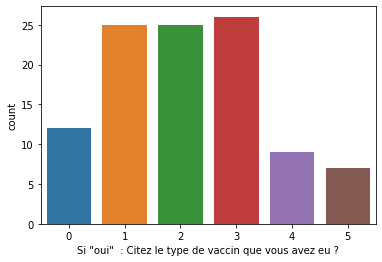

In [126]:
print(data['Si "oui"  : Citez le type de vaccin que vous avez eu ?'].value_counts())
sns.countplot(x='Si "oui"  : Citez le type de vaccin que vous avez eu ?',data = data)
plt.show()

In [127]:
#Séparer les variables explicatives X/Classe y
x =  data.drop(['Si "oui"  : Citez le type de vaccin que vous avez eu ?'], axis=1)
y = data['Si "oui"  : Citez le type de vaccin que vous avez eu ?']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=5)

In [128]:
neig = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i,k in enumerate(neig) :
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    
    test_accuracy.append(knn.score(x_test,y_test))

In [129]:
for i,k in enumerate(neig) :
    print(i,k)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19


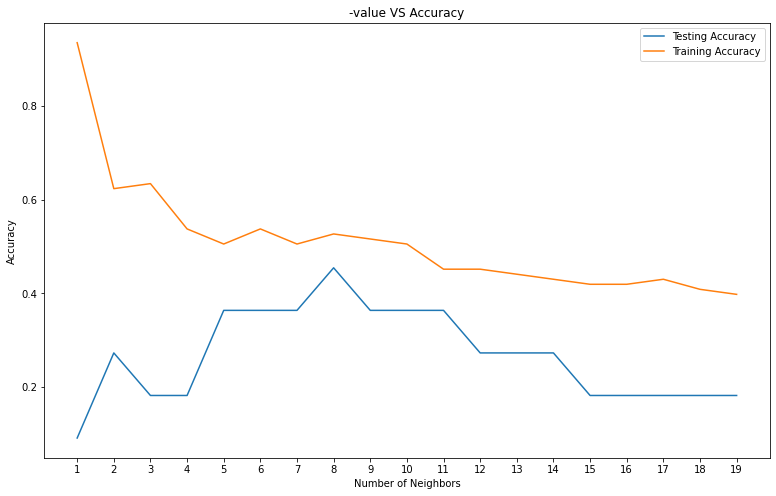

Best accuracy is 0.45454545454545453 with K = 8


In [130]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [131]:
kNN = KNeighborsClassifier(n_neighbors=8)

In [132]:
#Séparer les variables explicatives X/Classe y
#x =  data.drop(['Si "oui"  : Citez le type de vaccin que vous avez eu ?'], axis=1)
#y = data['Si "oui"  : Citez le type de vaccin que vous avez eu ?']

In [133]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=5)

In [134]:
print(x_train.shape)
print(x_test.shape)

(93, 9)
(11, 9)


In [135]:
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [136]:
y_pred = kNN.predict(x_test)

In [137]:
ac = metrics.accuracy_score(y_test,y_pred)

In [138]:
print(ac)

0.45454545454545453


In [139]:
data

,A quelle tranche d'âge appartenez vous ?,Vous êtes ?,Où habitez-vous ?,Avez vous contracté le Virus : COVID-19 ?,"Si ""oui"" : Quel(s) symptôme(s) ou signe(s) de la maladie avez-vous eu ?",Comment vous l'avait su?,Etes-vous hospitalisés ?,Est-ce que vous êtes vacciné?,"Si ""oui"" : Citez le type de vaccin que vous avez eu ?",Combien de doses avez-vous eu ?
0,0,2,0,0,0,1,0,1,1,0
1,0,2,0,1,0,1,0,1,3,1
2,0,1,0,1,0,1,1,1,1,1
3,0,1,0,1,3,0,0,1,1,0
4,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
99,2,2,1,1,1,1,1,1,0,1
100,0,1,0,1,4,1,0,0,5,3
101,2,2,0,1,4,0,1,1,1,1
102,0,2,0,1,3,1,0,0,1,0


In [140]:
kNN.predict([[0,2,0,1,3,1,0,0,0]])   

D:\Windows  Programs\DEV tools\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [141]:
kNN.predict([[2,2,1,1,2,0,0,1,1]])

D:\Windows  Programs\DEV tools\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [142]:
kNN.predict([[0,1,0,1,4,1,0,0,3]])

D:\Windows  Programs\DEV tools\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5])

In [143]:
kNN.predict([[0,1,0,1,4,1,0,1,3]])

D:\Windows  Programs\DEV tools\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [144]:
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i,k in enumerate(neig) :
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    
    test_accuracy.append(knn.score(x_test,y_test))

In [145]:
for i,k in enumerate(neig) :
    print(i,k)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24


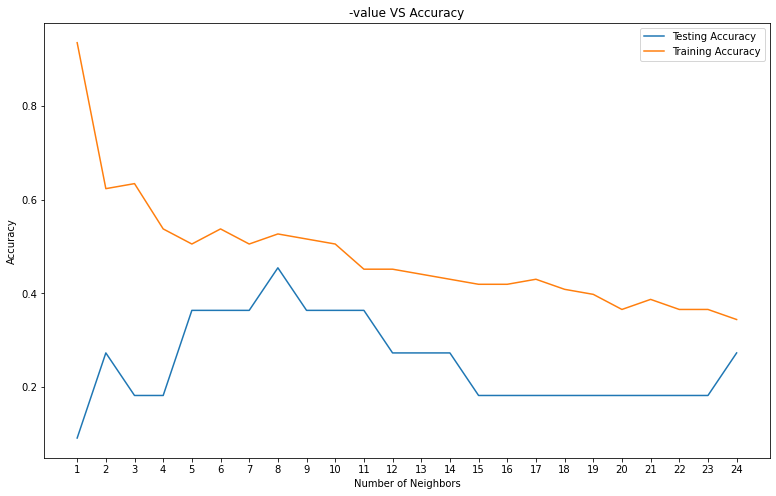

Best accuracy is 0.45454545454545453 with K = 8


In [146]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))